In [1]:
import hist
import mplhep as hep
import matplotlib.pyplot as plt
import numpy as np

# Styles

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'),
 supptext: Custom Text(1.012, 1, ''))

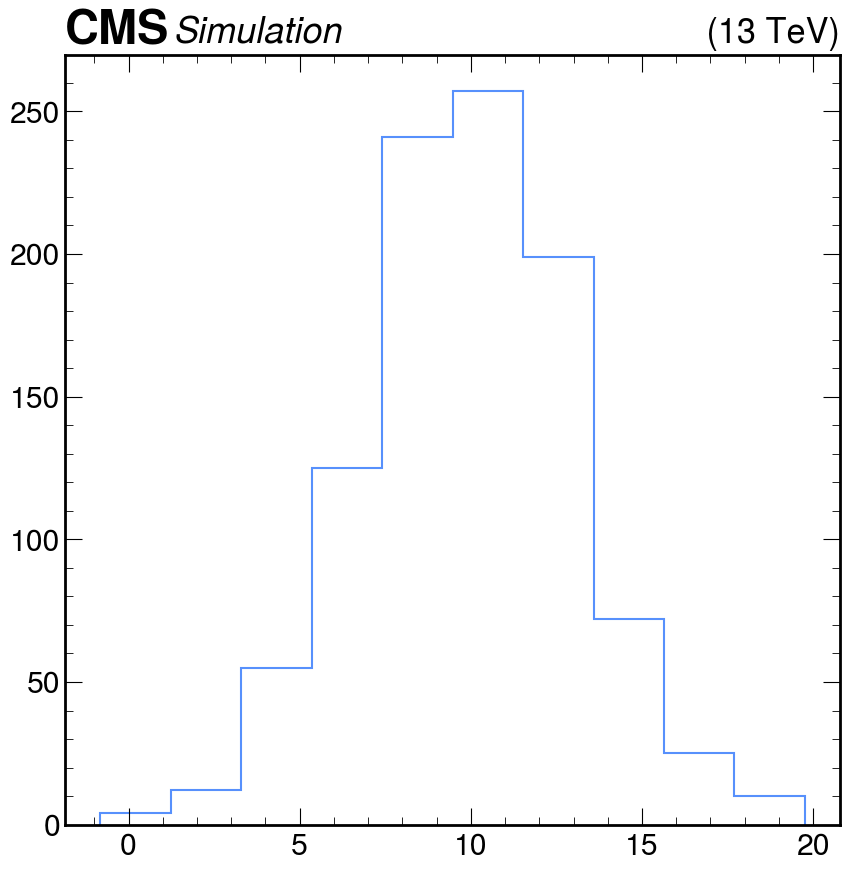

In [3]:
hep.style.use("CMS")
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)))
hep.cms.label() 

(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'),
 supptext: Custom Text(0.05, 0.945, ''))

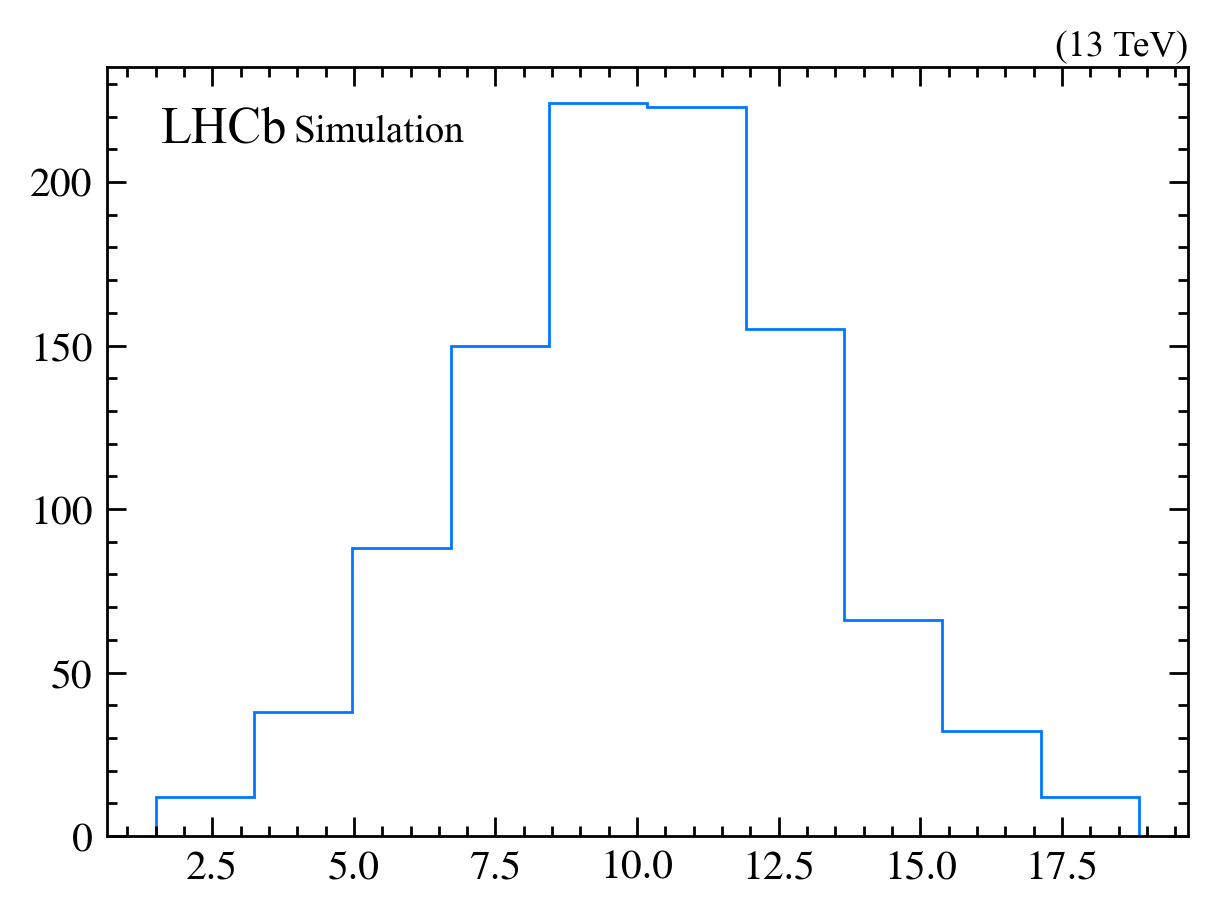

In [4]:
hep.style.use()
hep.style.use([hep.style.LHCb2])
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)))
hep.lhcb.label() 

(exptext: Custom Text(0.05, 0.95, 'ALICE'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'),
 supptext: Custom Text(0.05, 0.945, ''))

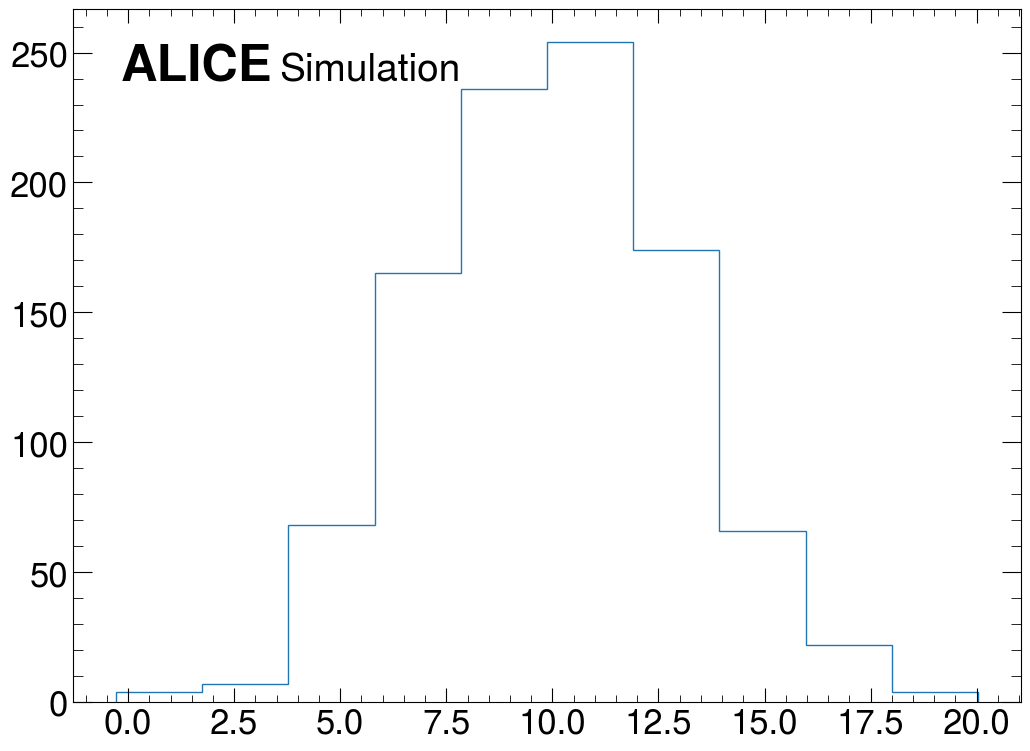

In [5]:
hep.style.use()
hep.style.use([hep.style.ALICE])
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)))
hep.alice.label() 

In [6]:
hep.style.use()

# Extended examples - mplhep

### Ratio Plot

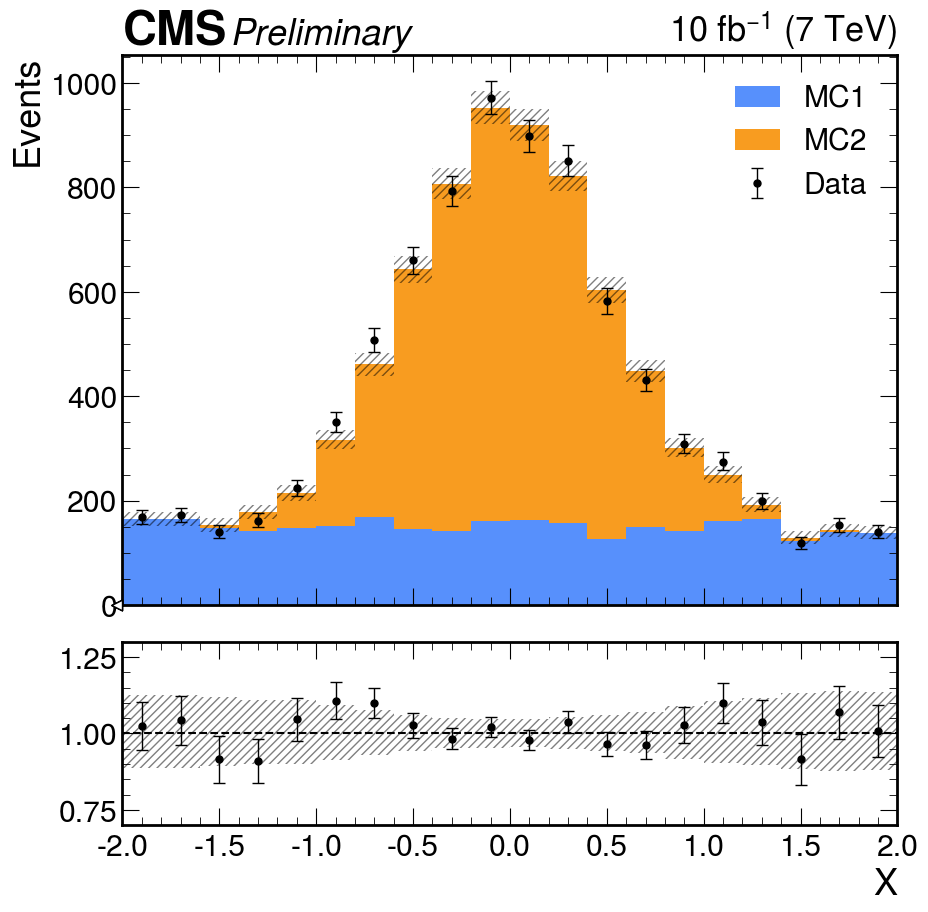

In [8]:
from hist.intervals import ratio_uncertainty

# Styling
hep.style.use("CMS")
fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.1), sharex=True)
hep.cms.label("Preliminary", com = 7, lumi = 10, data = True, loc=0, ax=ax);
ax.set_ylabel("Events")
rax.set_xlabel("X")

# Main plot
hep.histplot([a, b], ax=ax, stack=True, histtype='fill', label=["MC1", "MC2"])
hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")

# Error band
errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'edgecolor': 'k', 'alpha': 0.5}
hep.histplot(sum([a, b]), histtype='band', ax=ax, **errps)

# Ratio panel
hep.histplot(data.values()/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
    ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")
# Error band
yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson-ratio')
rax.stairs(1+yerr[1], edges=tot.axes[0].edges, baseline=1-yerr[0], **errps)

# Final styling
rax.axhline(1, ls='--', color='k')
rax.set_ylim(0.7, 1.3)
ax.set_xlabel("")
ax.set_xlim(-2, 2)
ax.legend();

### 2D Ratio plot

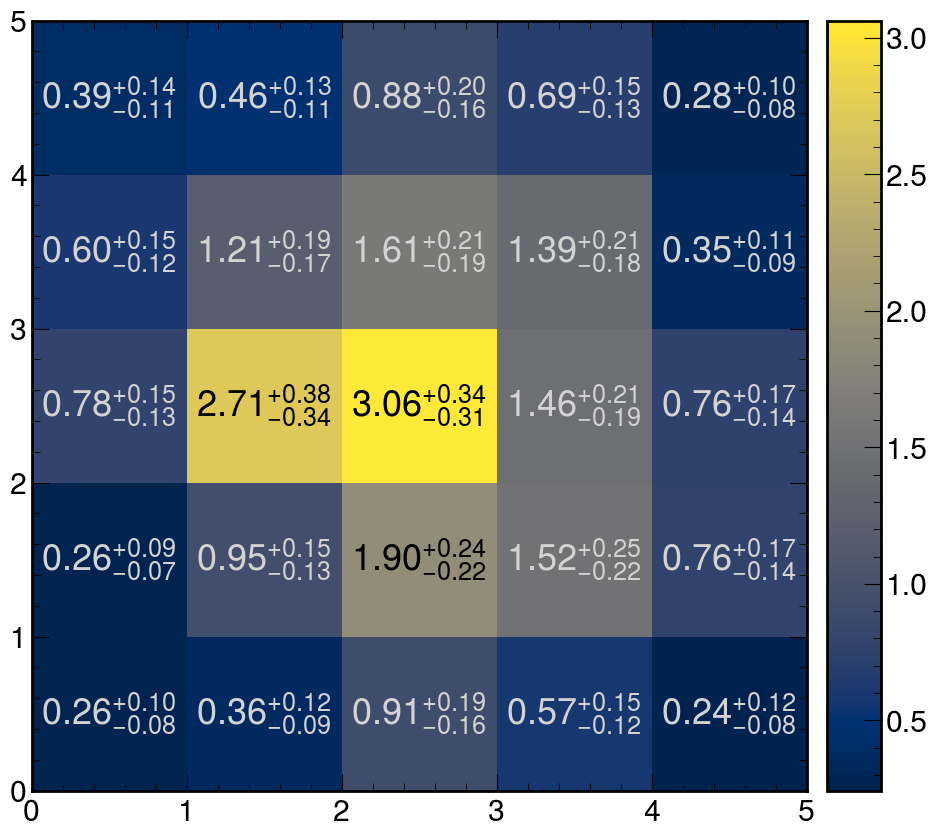

In [11]:
a = hist.Hist.new.Reg(5,-2,2).Reg(5,-2,2).Int64().fill(*np.random.normal(0,1,size=(2,1000)))
b = hist.Hist.new.Reg(5,-2,2).Reg(5,-2,2).Int64().fill(*np.random.uniform(-2,2,size=(2,1000)))

ratio = a.values() / b.values()
err_down, err_up = ratio_uncertainty(a.values(), b.values(), 'poisson')

def unctext(ra, u, d):
    ra, u, d = f'{ra:.2f}', f'{u:.2f}', f'{d:.2f}'
    return '$'+ra+'_{-'+d+'}^{+'+u+'}$'

labels = np.vectorize(unctext)(ratio, err_up, err_down)

hep.hist2dplot(ratio, labels=labels, cmap='cividis');